# Diabetics Readmitted Classifactions Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#loading data set
df=pd.read_csv('diabetic_data.csv')

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Exploratory Data Analysis

- The EDA or Exploratory Data Analysis is the process of understanding data by exploring and analysis data with the help of the different types of visualization graphs.

In [4]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
encounter_id,101766.0,1.652016e+08,1.026403e+08,12522.0,84961194.0,152388987.0,2.302709e+08,443867222.0
patient_nbr,101766.0,5.433040e+07,3.869636e+07,135.0,23413221.0,45505143.0,8.754595e+07,189502619.0
admission_type_id,101766.0,2.024006e+00,1.445403e+00,1.0,1.0,1.0,3.000000e+00,8.0
discharge_disposition_id,101766.0,3.715642e+00,5.280166e+00,1.0,1.0,1.0,4.000000e+00,28.0
admission_source_id,101766.0,5.754437e+00,4.064081e+00,1.0,1.0,7.0,7.000000e+00,25.0
time_in_hospital,101766.0,4.395987e+00,2.985108e+00,1.0,2.0,4.0,6.000000e+00,14.0
num_lab_procedures,101766.0,4.309564e+01,1.967436e+01,1.0,31.0,44.0,5.700000e+01,132.0
num_procedures,101766.0,1.339730e+00,1.705807e+00,0.0,0.0,1.0,2.000000e+00,6.0
num_medications,101766.0,1.602184e+01,8.127566e+00,1.0,10.0,15.0,2.000000e+01,81.0
number_outpatient,101766.0,3.693572e-01,1.267265e+00,0.0,0.0,0.0,0.000000e+00,42.0


In [7]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

The EDA part can be divided into two major pats

- 1) UniVariate Analysis

- 2) BiVariate Analysis

### UniVariente Analysis

The UniVarient Analysis is a simplest form of analyzing the data where we examine each and every individual varible and understand the data.

The UniVarient Analysis can be divided into two parts they are,
- 1. Numerical data
-- All the numerical features comes under this analysis
- 2. Categorical data
-- All the text data or object types comes under this analysis

### Numerical data

In [8]:
#List of numerical values
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print('number of numerical_features:',len(numerical_features))
print("the numerical features:",numerical_features)

number of numerical_features: 13
the numerical features: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


In [9]:
df[numerical_features].head()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,2278392,8222157,6,25,1,1,41,0,1,0,0,0,1
1,149190,55629189,1,1,7,3,59,0,18,0,0,0,9
2,64410,86047875,1,1,7,2,11,5,13,2,0,1,6
3,500364,82442376,1,1,7,2,44,1,16,0,0,0,7
4,16680,42519267,1,1,7,1,51,0,8,0,0,0,5


Numerical variables are usually of 2 type
- 1. Continous variable and 
- 2. Discrete Variables

In [10]:
##Discrete Variables
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<50]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 9


In [11]:
discrete_feature

['admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

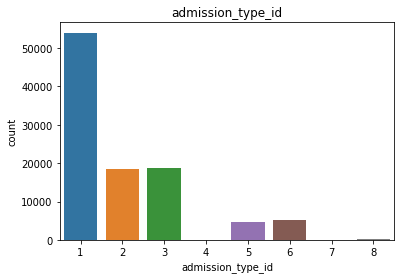

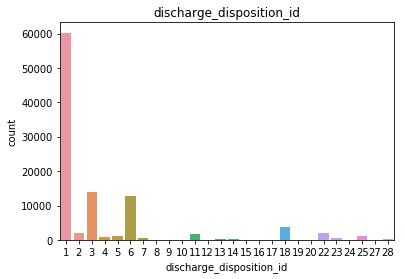

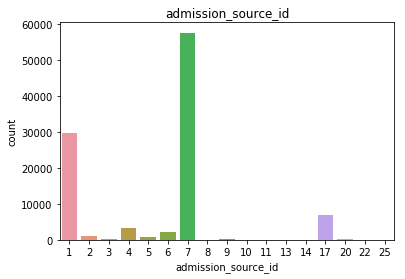

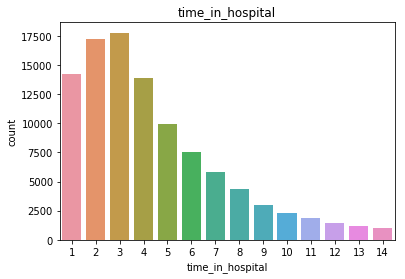

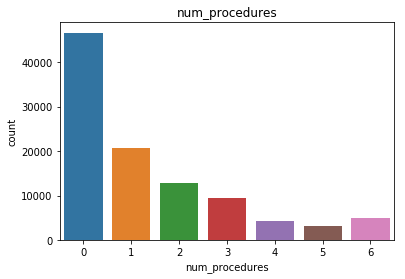

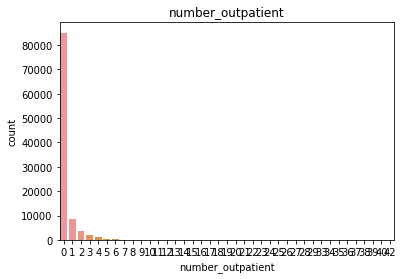

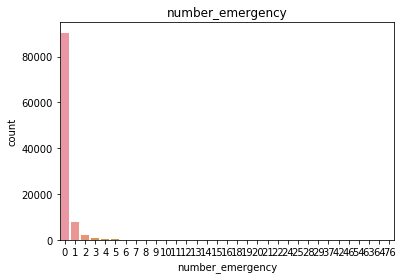

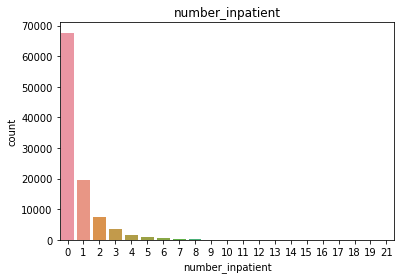

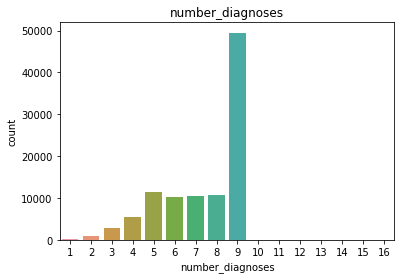

In [12]:
## Lets Find the discrete feature by visualizing data

for feature in discrete_feature:
    data=df.copy()
    sns.countplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [13]:
###continuous feature
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 4


In [14]:
df[continuous_feature].head()

,encounter_id,patient_nbr,num_lab_procedures,num_medications
0,2278392,8222157,41,1
1,149190,55629189,59,18
2,64410,86047875,11,13
3,500364,82442376,44,16
4,16680,42519267,51,8


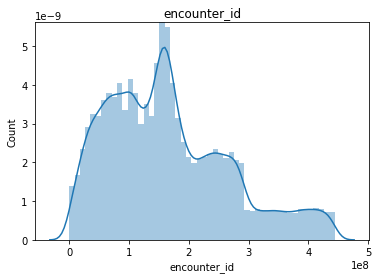

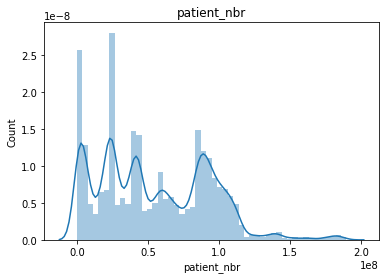

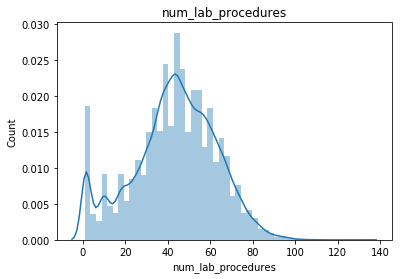

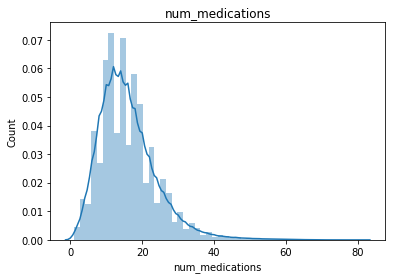

In [15]:
# Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    #data[feature].hist(bins=25)
    #plt.figure(figsize=(10,5))
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Data

In [16]:
#list of categorical features
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['race',
 'gender',
 'age',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

In [17]:
df[categorical_features].head()

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,?,Pediatrics-Endocrinology,250.83,?,?,None,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,?,?,276,250.01,255,None,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,?,?,648,250,V27,None,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,?,?,8,250.43,403,None,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,?,?,197,157,250,None,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is race and number of categories are 6
The feature is gender and number of categories are 3
The feature is age and number of categories are 10
The feature is weight and number of categories are 10
The feature is payer_code and number of categories are 18
The feature is medical_specialty and number of categories are 73
The feature is diag_1 and number of categories are 717
The feature is diag_2 and number of categories are 749
The feature is diag_3 and number of categories are 790
The feature is max_glu_serum and number of categories are 4
The feature is A1Cresult and number of categories are 4
The feature is metformin and number of categories are 4
The feature is repaglinide and number of categories are 4
The feature is nateglinide and number of categories are 4
The feature is chlorpropamide and number of categories are 4
The feature is glimepiride and number of categories are 4
The feature is acetohexamide and number of categories are 2
The feature is glipizide and number 

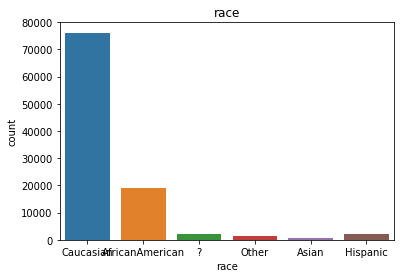

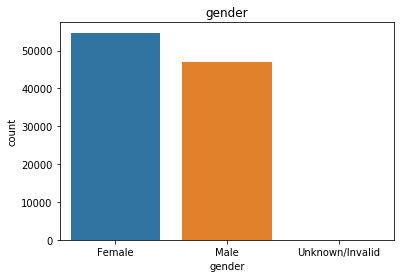

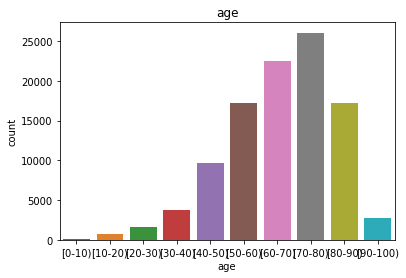

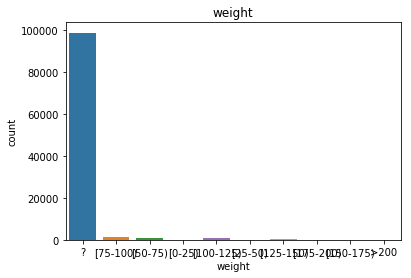

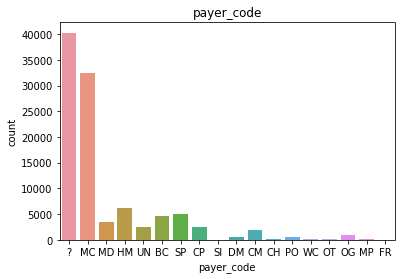

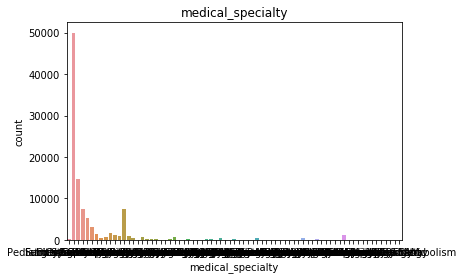

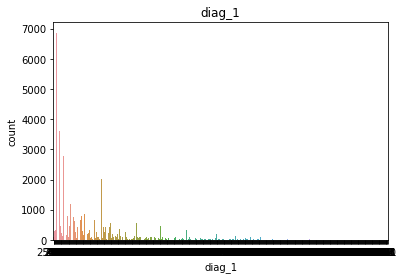

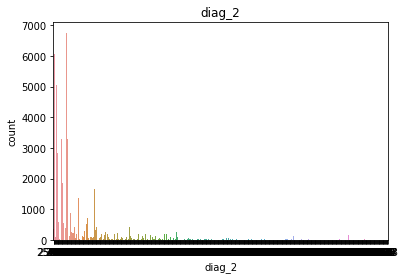

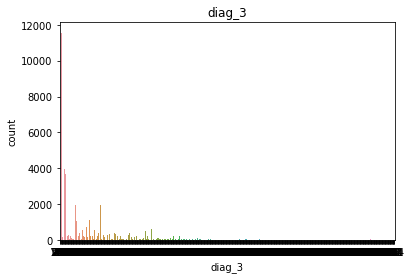

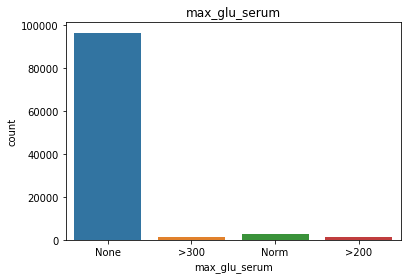

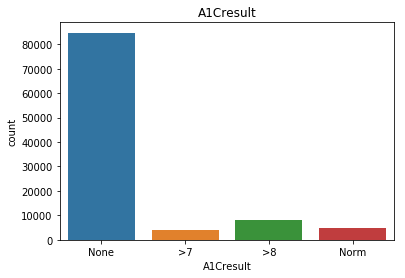

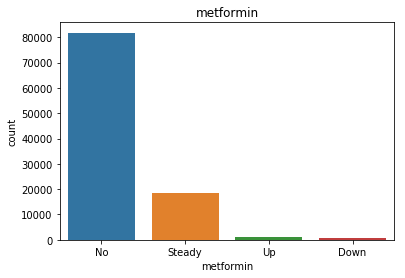

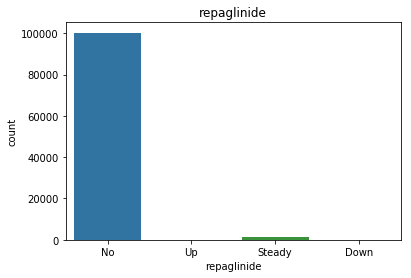

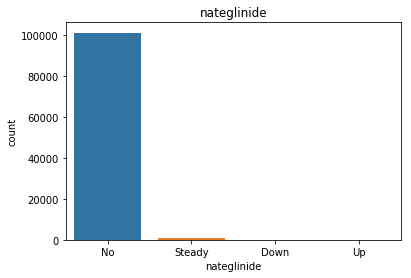

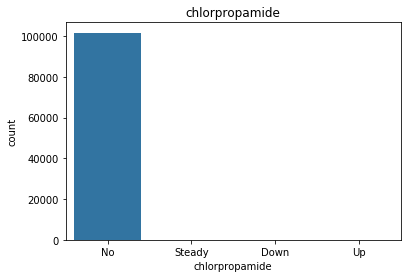

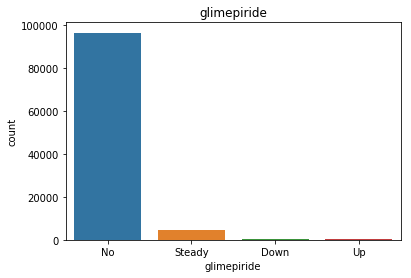

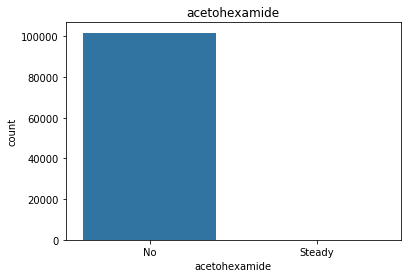

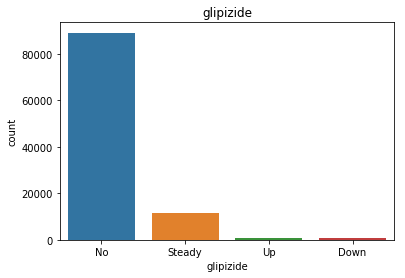

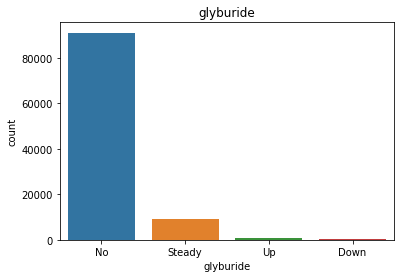

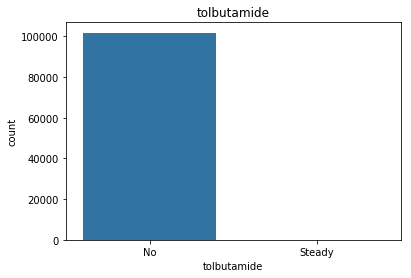

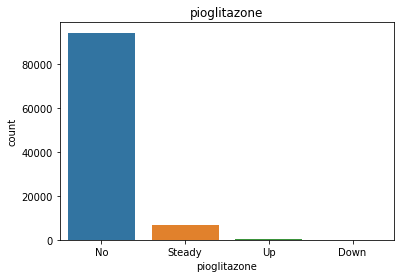

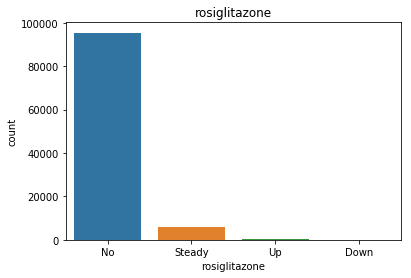

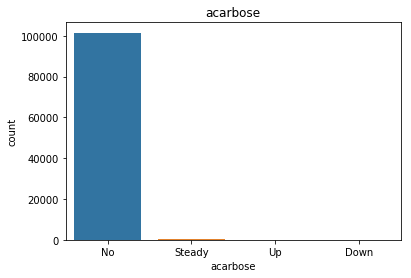

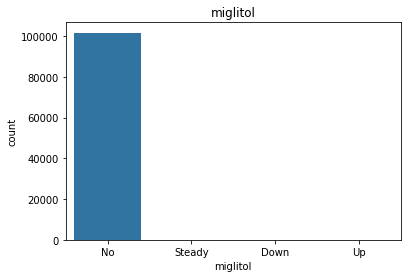

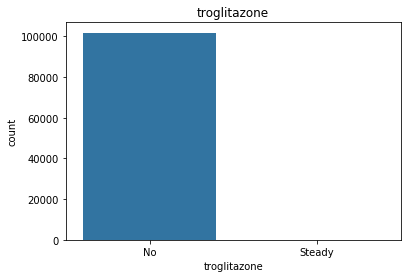

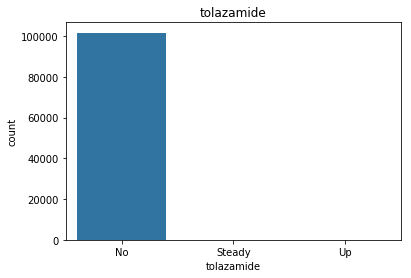

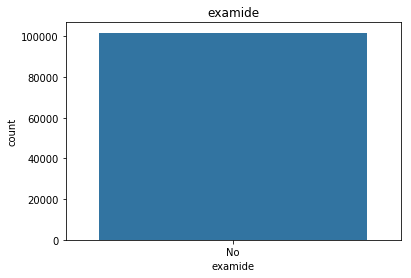

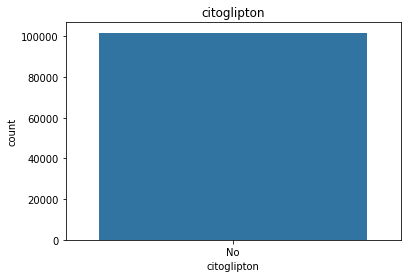

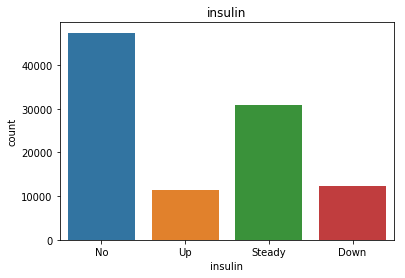

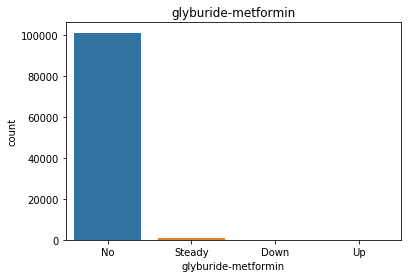

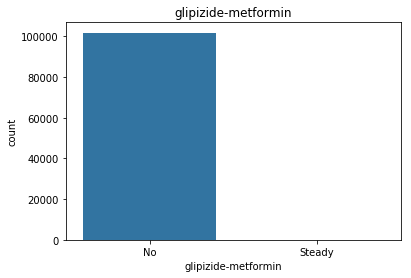

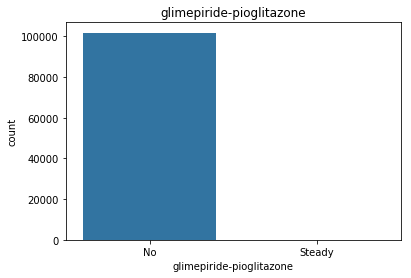

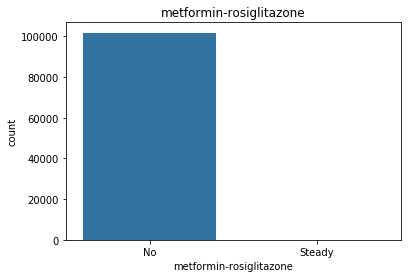

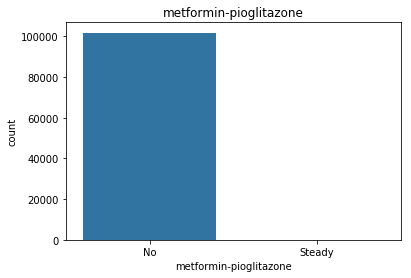

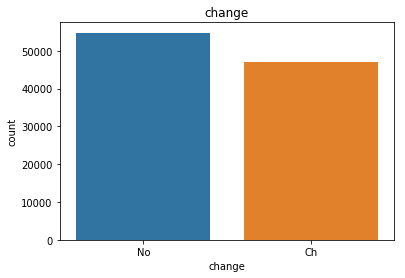

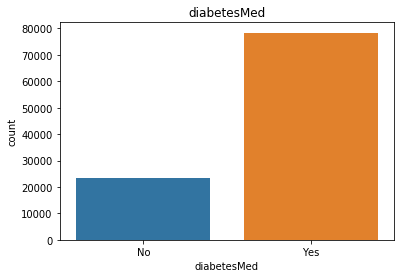

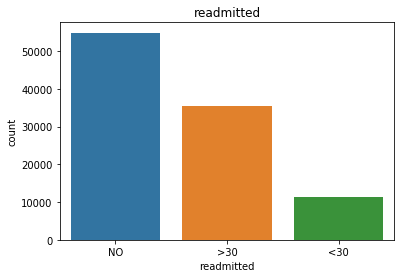

In [19]:
## Lets Find the categorical feature by visualizing data

for feature in categorical_features:
    data=df.copy()
    sns.countplot(data[feature])
    #data[feature].value_counts(normalize=True).plot.bar(title=feature)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

#### Unique value count

In [20]:
clm=df.columns
for i in clm:
    print('unique value count of ',i,'\n',df[i].value_counts())

unique value count of  encounter_id 
 96210942     1
89943846     1
384306986    1
94650156     1
83156784     1
2674482      1
281345844    1
193616274    1
355508024    1
165973818    1
125278944    1
420873188    1
157241154    1
161161032    1
174855390    1
134950734    1
154128210    1
96993108     1
122064144    1
297770840    1
382612616    1
165134172    1
108244830    1
210578766    1
443842340    1
151469730    1
289146210    1
154590960    1
145948404    1
176328594    1
            ..
249722520    1
111830682    1
126506652    1
80193186     1
186881700    1
147162726    1
263120844    1
249665124    1
151295556    1
113303472    1
73909806     1
422050106    1
13655088     1
168523320    1
296140568    1
98784828     1
157333056    1
280536642    1
130655706    1
190162530    1
107017800    1
103828530    1
176744010    1
172279374    1
297285200    1
74454612     1
208073976    1
166229592    1
38340702     1
77856768     1
Name: encounter_id, Length: 101766, dtype: int6

Name: diag_3, Length: 790, dtype: int64
unique value count of  number_diagnoses 
 9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64
unique value count of  max_glu_serum 
 None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64
unique value count of  A1Cresult 
 None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64
unique value count of  metformin 
 No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
unique value count of  repaglinide 
 No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
unique value count of  nateglinide 
 No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
unique value count of  chlorpropamid

### BiVariate Analysis

In Bivariate Analysis we compare the target column with all the other columns


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

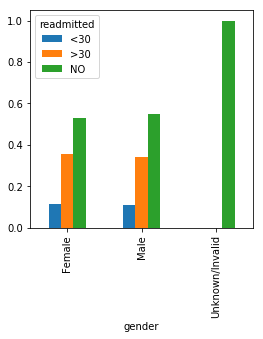

In [22]:
gender=pd.crosstab(df['gender'],df['readmitted'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

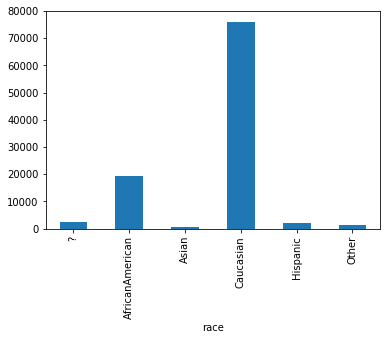

In [23]:
graph=df.groupby('race').count()
graph['readmitted'].plot(kind='bar')

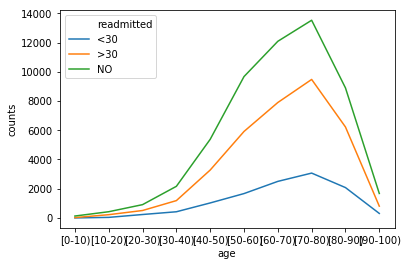

In [24]:
count_of_y = df["age"].groupby(df["readmitted"]).value_counts().rename("counts").reset_index()
fig = sns.lineplot(x="age", y="counts", hue="readmitted", data=count_of_y)

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

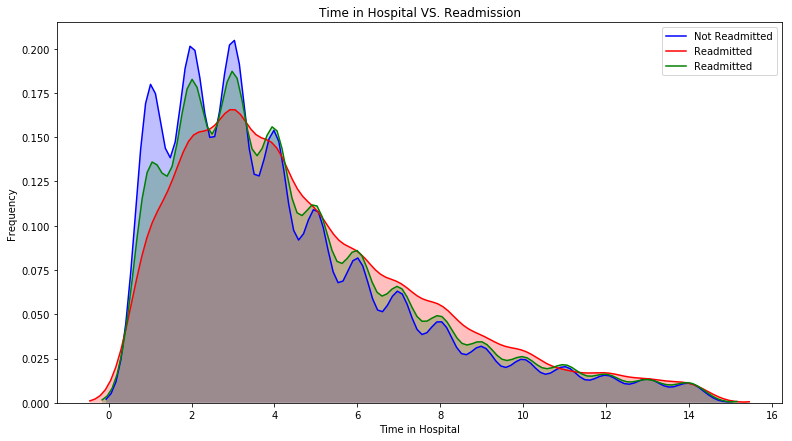

In [25]:
fig = plt.figure(figsize=(13,7))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 'NO'),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] =='>30'),'time_in_hospital'] , color='g',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

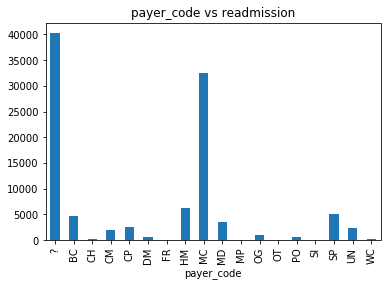

In [26]:
df.groupby('payer_code')['readmitted'].count().plot.bar(title='payer_code vs readmission')

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

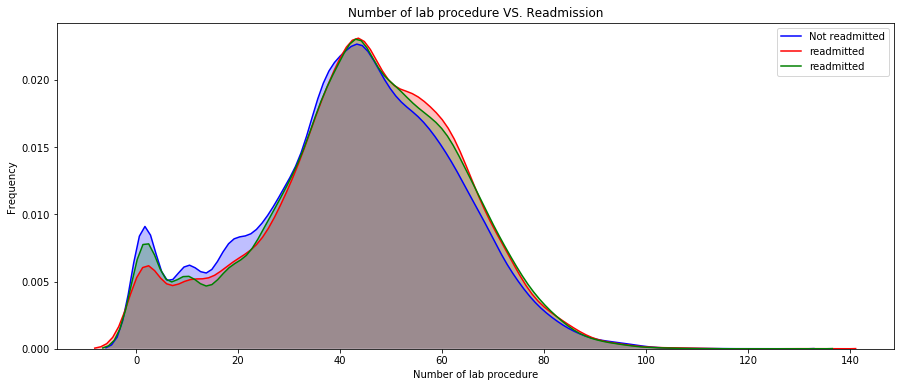

In [27]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 'NO'),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '>30'),'num_lab_procedures'] , color='g',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

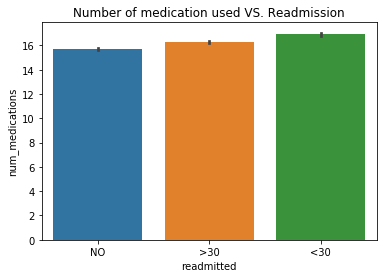

In [28]:
sns.barplot(y='num_medications',x='readmitted',data=df)
plt.title("Number of medication used VS. Readmission")

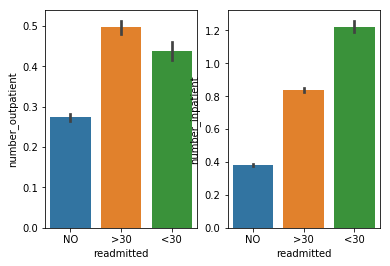

In [29]:
plt.figure
plt.subplot(1,2,1)
sns.barplot(y='number_outpatient',x='readmitted',data=df)
plt.subplot(1,2,2)
sns.barplot(y='number_inpatient',x='readmitted',data=df)

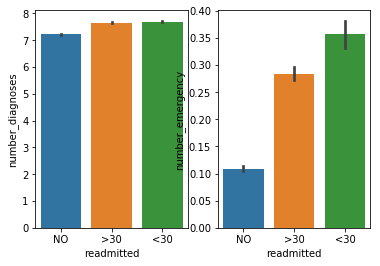

In [30]:
plt.figure
plt.subplot(1,2,1)
sns.barplot(y='number_diagnoses',x='readmitted',data=df)
plt.subplot(1,2,2)
sns.barplot(y='number_emergency',x='readmitted',data=df)

Glucose Serum test - A blood glucose test is used to find out if your blood sugar levels are in the healthy range. It is often used to help diagnose and monitor diabetes.

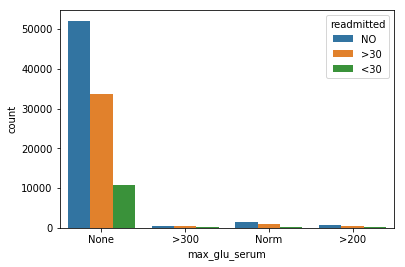

In [31]:
sns.countplot(x='max_glu_serum',hue='readmitted',data=df)

A1C result and Readmission A1C test - The A1C test is a blood test that provides information about your average levels of blood glucose, also called blood sugar, over the past 3 months.

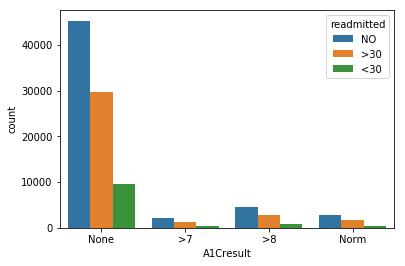

In [32]:
sns.countplot(x='A1Cresult',hue='readmitted',data=df)

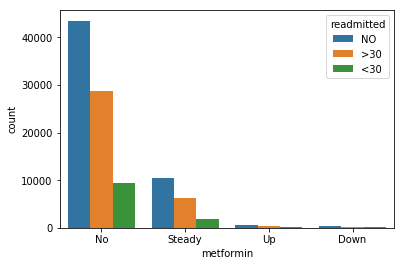

In [33]:
sns.countplot(x='metformin',hue='readmitted',data=df)

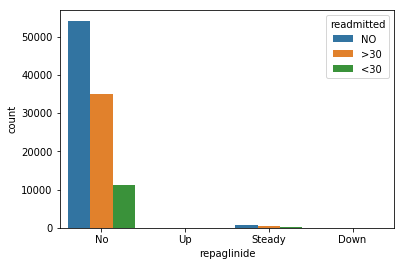

In [34]:
sns.countplot(x='repaglinide',hue='readmitted',data=df)

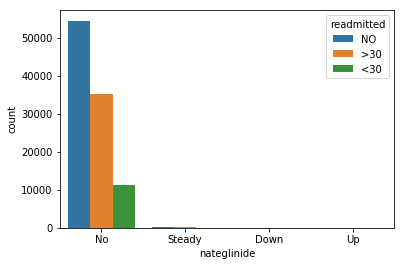

In [35]:
sns.countplot(x='nateglinide',hue='readmitted',data=df)

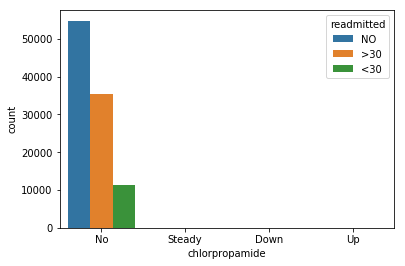

In [36]:
sns.countplot(x='chlorpropamide',hue='readmitted',data=df)

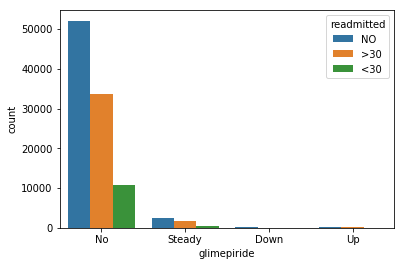

In [37]:
sns.countplot(x='glimepiride',hue='readmitted',data=df)

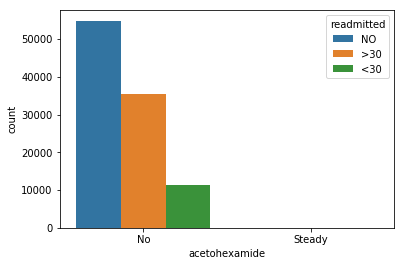

In [38]:
sns.countplot(x='acetohexamide',hue='readmitted',data=df)

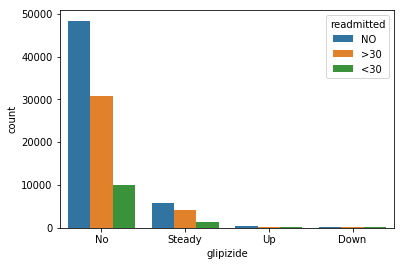

In [39]:
sns.countplot(x='glipizide',hue='readmitted',data=df)

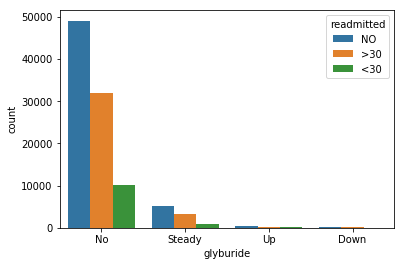

In [40]:
sns.countplot(x='glyburide',hue='readmitted',data=df)

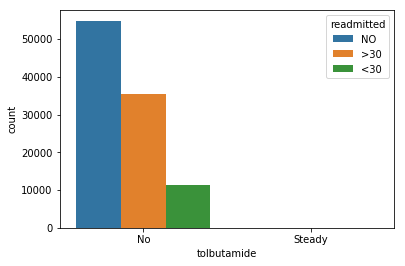

In [41]:
sns.countplot(x='tolbutamide',hue='readmitted',data=df)

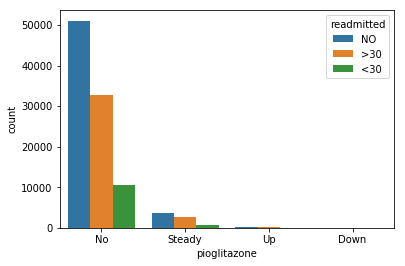

In [42]:
sns.countplot(x='pioglitazone',hue='readmitted',data=df)

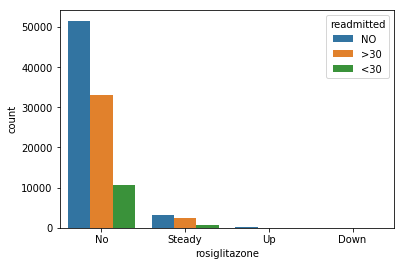

In [43]:
sns.countplot(x='rosiglitazone',hue='readmitted',data=df)

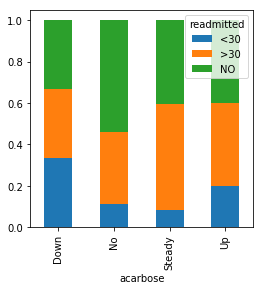

In [44]:
acarbose=pd.crosstab(df['acarbose'],df['readmitted'])
acarbose.div(acarbose.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

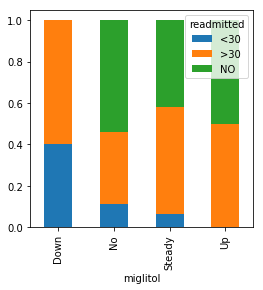

In [45]:
miglitol=pd.crosstab(df['miglitol'],df['readmitted'])
miglitol.div(miglitol.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

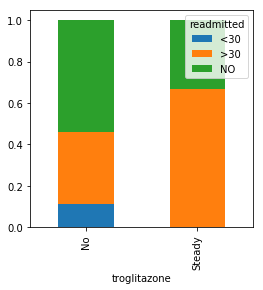

In [46]:
troglitazone=pd.crosstab(df['troglitazone'],df['readmitted'])
troglitazone.div(troglitazone.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

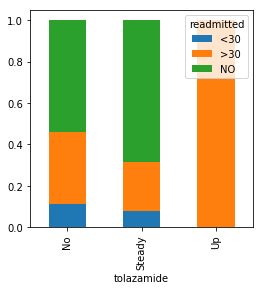

In [47]:
tolazamide=pd.crosstab(df['tolazamide'],df['readmitted'])
tolazamide.div(tolazamide.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

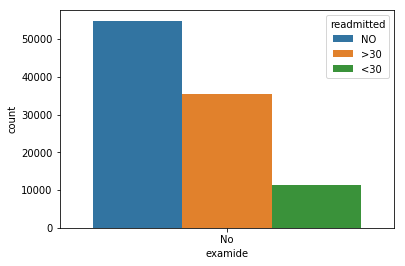

In [48]:
sns.countplot(x='examide',hue='readmitted',data=df)

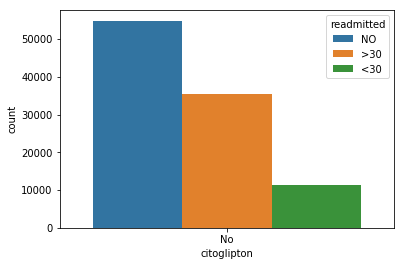

In [49]:
sns.countplot(x='citoglipton',hue='readmitted',data=df)

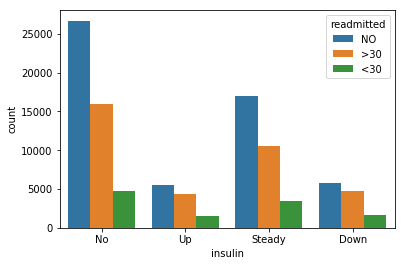

In [50]:
sns.countplot(x='insulin',hue='readmitted',data=df)

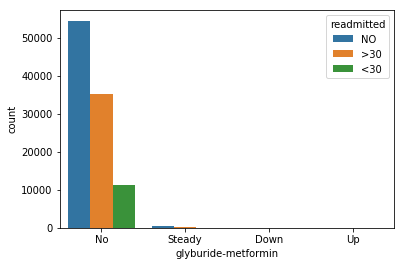

In [51]:
sns.countplot(x='glyburide-metformin',hue='readmitted',data=df)

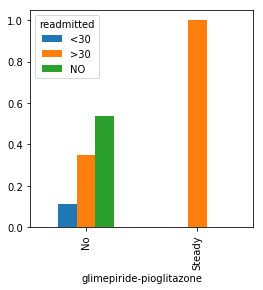

In [52]:
glimepiride_pioglitazone=pd.crosstab(df['glimepiride-pioglitazone'],df['readmitted'])
glimepiride_pioglitazone.div(glimepiride_pioglitazone.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

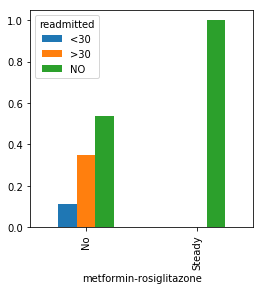

In [53]:
metformin_rosiglitazone=pd.crosstab(df['metformin-rosiglitazone'],df['readmitted'])
metformin_rosiglitazone.div(metformin_rosiglitazone.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,figsize=(4,4))

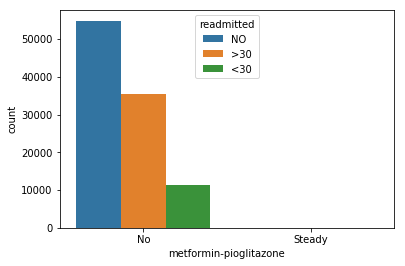

In [54]:
sns.countplot(x='metformin-pioglitazone',hue='readmitted',data=df)

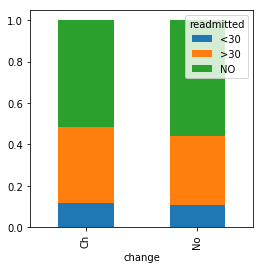

In [55]:
change=pd.crosstab(df['change'],df['readmitted'])
change.div(change.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

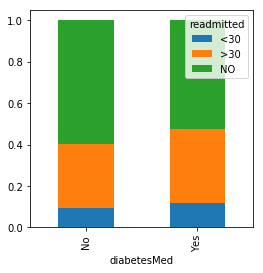

In [56]:
diabetesMed=pd.crosstab(df['diabetesMed'],df['readmitted'])
diabetesMed.div(diabetesMed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))

# Preprocessing

In [57]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [58]:
df.replace('?', np.nan, inplace=True)

In [59]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [60]:
df.shape

(101766, 50)

In [61]:
df.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

We can observe that weight contains 96 % missing values and payer_code,medical_specialty has approximately 40%,50% missing values so there is no significance to filling those missing values. so we decided to drop those missing values

In [62]:
print('unique values in enounter id ',df['encounter_id'].nunique())
print('unique values in diag_1  ',df['diag_1'].nunique())
print('unique values in diag_2 ',df['diag_2'].nunique())
print('unique values in diag_3 ',df['diag_3'].nunique())

unique values in enounter id  101766
unique values in diag_1   716
unique values in diag_2  748
unique values in diag_3  789


In [63]:
df.drop(['encounter_id','diag_1','diag_2','diag_3'],axis=1,inplace=True)

We can observe that encounter_id,diag_1,diag_2 and diag_3 has high unique values and they ara not showing much impact on target column. 

### Data Manipulation 

#### race column

In [64]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [65]:
df.race=df.race.fillna('Other')

In [66]:
df.loc[df['race'] == 'Caucasian', ['race']] = 1
df.loc[df['race'] == 'AfricanAmerican', ['race']] = 0
df.loc[df['race'] == 'Other', ['race']] = 2
df.loc[df['race'] == 'Asian', ['race']] = 3
df.loc[df['race'] == 'Hispanic', ['race']] = 4

In [67]:
df['race'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

#### gender column

In [68]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [69]:
df.loc[df['gender'] == 'Female', ['gender']] = 0
df.loc[df['gender'] == 'Male', ['gender']] = 1
df.loc[df['gender'] == 'Unknown/Invalid', ['gender']] = 0

#### age column

In [70]:
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [71]:
df.loc[df['age'] == '[0-10)', ['age']] = 0
df.loc[df['age'] == '[10-20)', ['age']] = 0
df.loc[df['age'] == '[20-30)', ['age']] = 1
df.loc[df['age'] == '[30-40)', ['age']] = 1
df.loc[df['age'] == '[40-50)', ['age']] = 2
df.loc[df['age'] == '[50-60)', ['age']] = 2
df.loc[df['age'] == '[60-70)', ['age']] = 3
df.loc[df['age'] == '[70-80)', ['age']] = 3
df.loc[df['age'] == '[80-90)', ['age']] = 4
df.loc[df['age'] == '[90-100)', ['age']] = 4

#### max_glu_serum column 

In [72]:
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [73]:
df.loc[df['max_glu_serum'] == 'None', ['max_glu_serum']] = 0
df.loc[df['max_glu_serum'] == 'Norm', ['max_glu_serum']] = 1
df.loc[df['max_glu_serum'] == '>200', ['max_glu_serum']] = 2
df.loc[df['max_glu_serum'] == '>300', ['max_glu_serum']] = 3

#### AlCresult column

In [74]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [75]:
df.loc[df['A1Cresult'] == 'None', ['A1Cresult']] = 0
df.loc[df['A1Cresult'] == 'Norm', ['A1Cresult']] = 1
df.loc[df['A1Cresult'] == '>7', ['A1Cresult']] = 2
df.loc[df['A1Cresult'] == '>8', ['A1Cresult']] = 3

#### change column

In [76]:
df['change'].value_counts()

No    54755
Ch    47011
Name: change, dtype: int64

In [77]:
df.loc[df['change'] == 'No', ['change']] = 0
df.loc[df['change'] == 'Ch', ['change']] = 1

#### diabetesMed column

In [78]:
df['diabetesMed'].value_counts()

Yes    78363
No     23403
Name: diabetesMed, dtype: int64

In [79]:
df.loc[df['diabetesMed'] == 'Yes', ['diabetesMed']] = 1
df.loc[df['diabetesMed'] == 'No', ['diabetesMed']] = 0

#### readmitted column

In [80]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [81]:
df.loc[df['readmitted'] == '<30', ['readmitted']] = 1 #0,087
df.loc[df['readmitted'] == '>30', ['readmitted']] = 0 #0,912
df.loc[df['readmitted'] == 'NO', ['readmitted']] = 0

In [82]:
df['readmitted'].value_counts()

0    90409
1    11357
Name: readmitted, dtype: int64

#### other columns

In [83]:
metricas = ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", 
           "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", 
           "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]
for i in metricas:
    print('unique value count of ',i,'\n',df[i].value_counts())

unique value count of  metformin 
 No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64
unique value count of  repaglinide 
 No        100227
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64
unique value count of  nateglinide 
 No        101063
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64
unique value count of  chlorpropamide 
 No        101680
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64
unique value count of  glimepiride 
 No        96575
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64
unique value count of  acetohexamide 
 No        101765
Steady         1
Name: acetohexamide, dtype: int64
unique value count of  glipizide 
 No        89080
Steady    11356
Up          770
Down        560
Name: glipizide, dtype: int64
unique value count of  glyburide 
 No        91116
Steady     9274
Up          812
Do

In [84]:

for i in metricas:
    df.loc[df[i] == 'Up', [i]] = 1  #sim o medicamento foi prescito-aumentou a doze
    df.loc[df[i] == 'Down', [i]] = 1 #sim o medicamento foi prescito-baixou a doze
    df.loc[df[i] == 'Steady', [i]] = 1 #sim o medicamento foi prescito -manteve a doze
    df.loc[df[i] == 'No', [i]] = 0 #nao foi prescrito

### Handling imbalance data

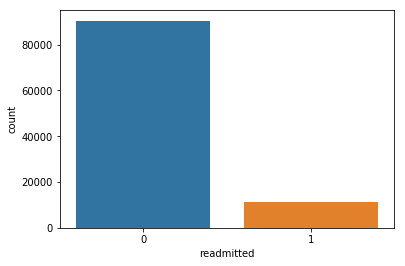

In [85]:
sns.countplot(x='readmitted',data=df)

In [86]:
not_readmitted=df[df.readmitted==0]
readmitted=df[df.readmitted==1]

In [87]:
from sklearn.utils import resample

In [88]:
#upsample minority
readmitted_upsampled = resample(readmitted,
                          replace=True, # sample with replacement
                          n_samples=len(not_readmitted), # match number in majority class
                          random_state=27) # reproducible results
# combine majority and upsampled minority
data = pd.concat([not_readmitted, readmitted_upsampled])

# check new class counts
data.readmitted.value_counts()

1    90409
0    90409
Name: readmitted, dtype: int64

we used over sampling technic to make the data set balanced

In [89]:
data.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,1,0,0,6,25,1,1,41,0,...,0,0,0,0,0,0,0,0,0,0
1,55629189,1,0,0,1,1,7,3,59,0,...,0,1,0,0,0,0,0,1,1,0
2,86047875,0,0,1,1,1,7,2,11,5,...,0,0,0,0,0,0,0,0,1,0
3,82442376,1,1,1,1,1,7,2,44,1,...,0,1,0,0,0,0,0,1,1,0
4,42519267,1,1,2,1,1,7,1,51,0,...,0,1,0,0,0,0,0,1,1,0


In [90]:
data.shape

(180818, 43)

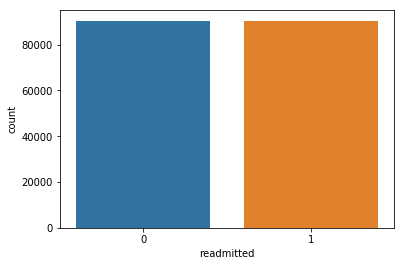

In [91]:
sns.countplot(x='readmitted',data=data)

## Feature Selection

In [92]:
clm=data.columns
for i in clm:
    print('correlation between ',i,'and readmitted is ',df[i].corr(df['readmitted']))

correlation between  patient_nbr and readmitted is  0.007893288940943535
correlation between  race and readmitted is  -0.0076097288074314
correlation between  gender and readmitted is  -0.002897950833680294
correlation between  age and readmitted is  0.01916293990583613
correlation between  admission_type_id and readmitted is  -0.01165137288870758
correlation between  discharge_disposition_id and readmitted is  0.05056026858575127
correlation between  admission_source_id and readmitted is  0.005819596094426516
correlation between  time_in_hospital and readmitted is  0.04419941845744686
correlation between  num_lab_procedures and readmitted is  0.020363602567542428
correlation between  num_procedures and readmitted is  -0.012226934251745264
correlation between  num_medications and readmitted is  0.038431822165995604
correlation between  number_outpatient and readmitted is  0.018893470155426466
correlation between  number_emergency and readmitted is  0.060746500142537366
correlation betw

In [93]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [94]:
X=data.drop('readmitted',axis=1)
y=data['readmitted']

In [95]:
bestfeatues=SelectKBest(score_func=chi2,k=20)
fit=bestfeatues.fit(X,y)

In [96]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(X.columns)

In [97]:
featureScores=pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['featues','score']

In [98]:
featureScores

,featues,score
0,patient_nbr,1.128577e+09
1,race,1.491312e+01
2,gender,9.874840e-01
3,age,4.191871e+01
4,admission_type_id,6.692549e+01
5,discharge_disposition_id,8.321163e+03
6,admission_source_id,3.131816e+01
7,time_in_hospital,1.831647e+03
8,num_lab_procedures,1.848617e+03
9,num_procedures,1.088479e+02


In [99]:
df.drop(['number_outpatient','number_emergency','chlorpropamide','acetohexamide', 'tolbutamide','miglitol','troglitazone',
         'tolazamide','examide','citoglipton', 'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone', ],axis=1,inplace=True)
                
                

We have selected columns with high correlation and with high kbest score then removied the remaining columns

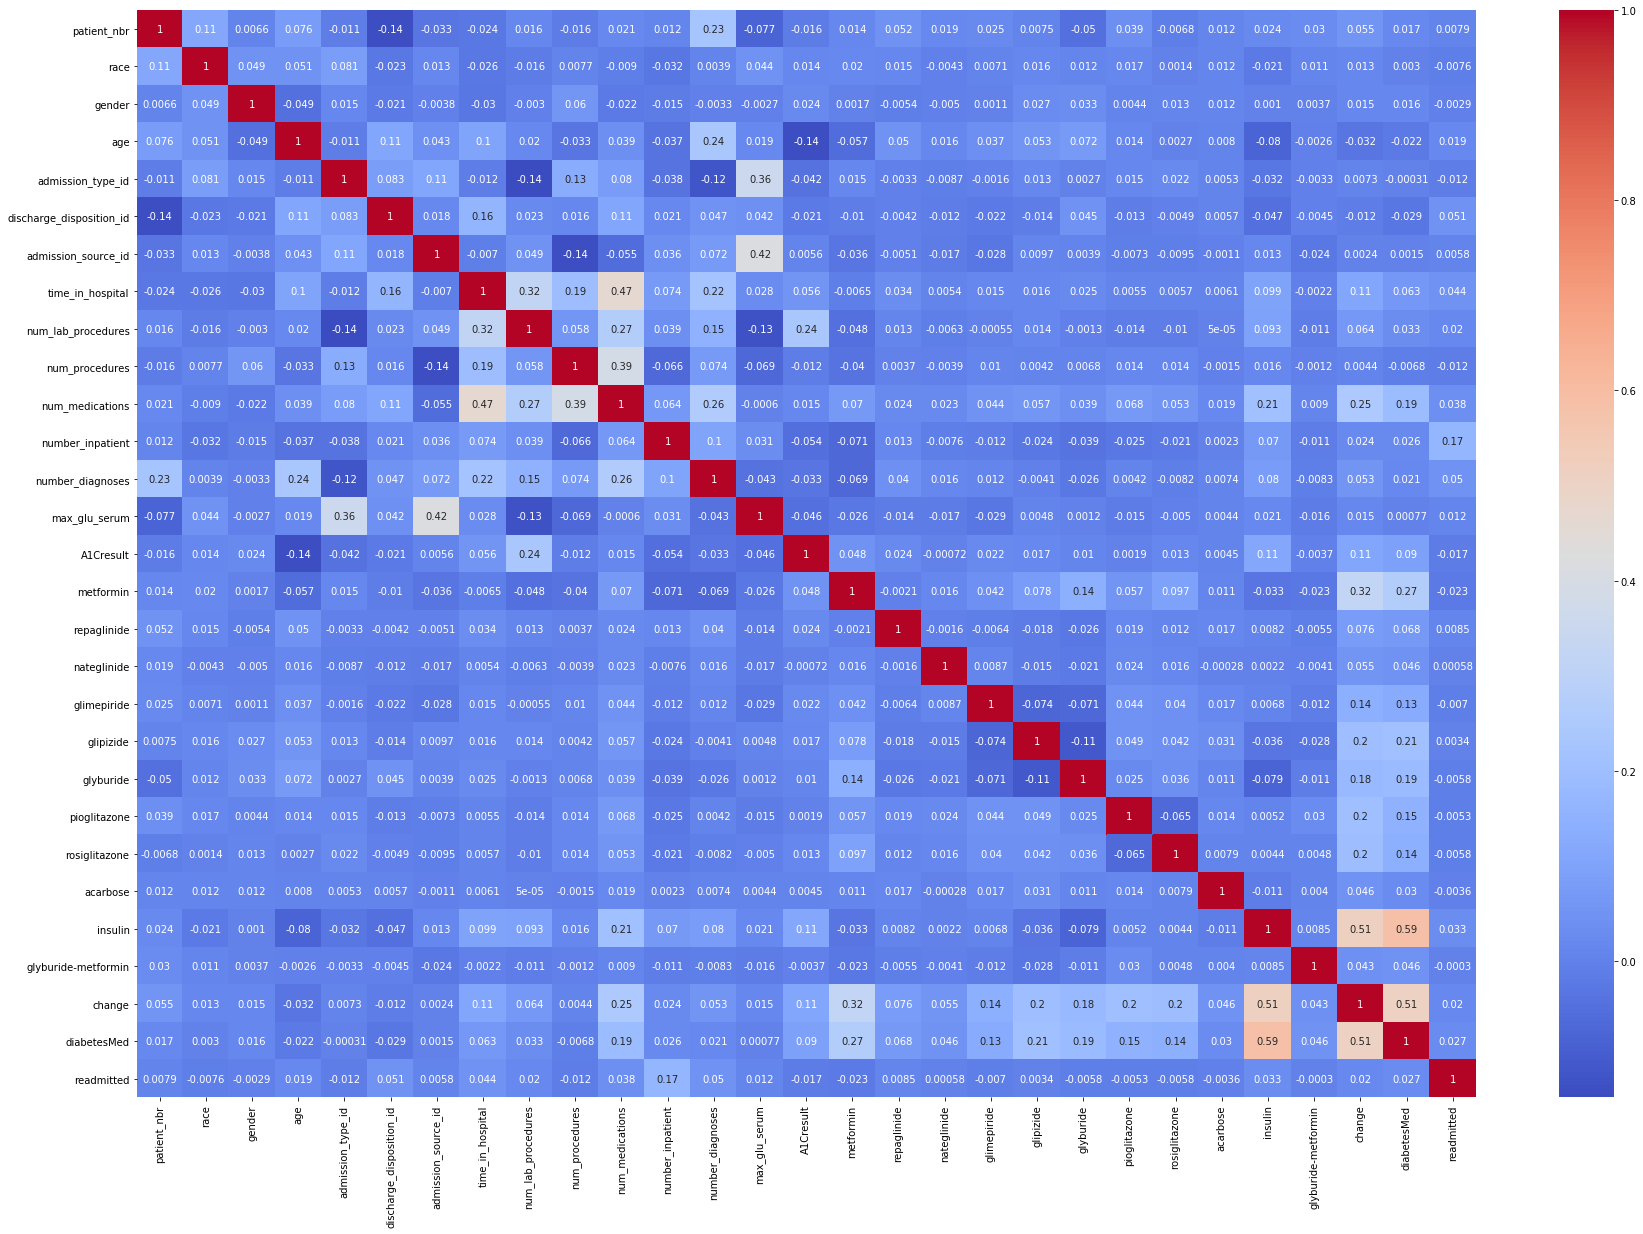

In [100]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

### Train Test Split

In [101]:
X=data.drop('readmitted',axis=1)
y=data['readmitted']

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Model Creatation

### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [105]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [106]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [107]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.5032352615861078
confusion_matrix: [[    0 17965]
 [    0 18199]]
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00     17965
           1       0.50      1.00      0.67     18199

   micro avg       0.50      0.50      0.50     36164
   macro avg       0.25      0.50      0.33     36164
weighted avg       0.25      0.50      0.34     36164



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [110]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [111]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.613068244663201
confusion_matrix: [[10168  7797]
 [ 6196 12003]]
classification_report:               precision    recall  f1-score   support

           0       0.62      0.57      0.59     17965
           1       0.61      0.66      0.63     18199

   micro avg       0.61      0.61      0.61     36164
   macro avg       0.61      0.61      0.61     36164
weighted avg       0.61      0.61      0.61     36164



### Random Forest

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf=RandomForestClassifier(n_estimators=50, random_state=0)

In [114]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [115]:
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',classification_report(y_test,y_pred))

accuracy_score: 0.9944419865059175
confusion_matrix: [[17782   183]
 [   18 18181]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99     17965
           1       0.99      1.00      0.99     18199

   micro avg       0.99      0.99      0.99     36164
   macro avg       0.99      0.99      0.99     36164
weighted avg       0.99      0.99      0.99     36164



### checking overfitting or underfitting

#### Logistic Regression

In [116]:
print('Train set score: ',format(lr.score(X_train,y_train)))
print('Test set score: ',format(lr.score(X_test,y_test)))

Train set score:  0.49919117342071423
Test set score:  0.5032352615861078


#### Decision Tree

In [117]:
print('Train set score: ',format(dt.score(X_train,y_train)))
print('Test set score: ',format(dt.score(X_test,y_test)))

Train set score:  0.6130974601462801
Test set score:  0.613068244663201


#### Random Forest

In [118]:
print('Train set score: ',format(rf.score(X_train,y_train)))
print('Test set score: ',format(rf.score(X_test,y_test)))

Train set score:  1.0
Test set score:  0.9944419865059175
